<a href="https://colab.research.google.com/github/ProfAI/tf00/blob/master/4%20-%20Tensorflow%20Avanzato/lambda_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Strati Lambda
In questo notebook addestreremo una rete neurale per affrontare un semplicissimo problema di computer vision: riconoscere cifre scritte a mano. Inoltre vedremo come utilizzare degli **Strati Lambda** per eseguire del codice custom all'interno della rete neurale

## Importiamo i Moduli

In [ ]:
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from time import time

## Prepariamo i Dati
Il dataset che utilizzeremo è il MNIST, una raccolta di immagini in bianco e nero di cifre scritte a mano. Per importare il dataset possiamo sfruttare il modulo *tensorflow_datasets*.

In [ ]:
dataset = tfds.load('mnist', split='train', shuffle_files=True)

Definiamo una funzione che legge gli esempi dal dataset e li inserisce all'interno di due array numpy, uno con le features e un'altro con i target. Utilizziamo il parametro opzionale *num_samples* per limitare il numero di esempi da utilizzare.

In [ ]:
def load_data(dataset, num_samples=None):
  images = []
  labels = []

  for i, example in enumerate(tfds.as_numpy(dataset)):

    if(num_samples!=None and i>=num_samples):
      break

    images.append(example["image"])
    labels.append(example["label"])

  images = np.array(images)
  labels = np.array(labels)

  return images, labels

Adesso utilizziamo la funzione per creare il dataset.

In [ ]:
images, labels = load_data(dataset)
num_classes = np.unique(labels).shape[0] # contiamo il numero di classi uniche
print("Numero di esempi: %d" % images.shape[0])
print("Dimensioni immagine: %s" % str(images[0].shape))
print("Classi = %d %s" % (num_classes, np.unique(labels)))

Numero di esempi: 60000
Dimensioni immagine: (28, 28, 1)
Classi = 10 [0 1 2 3 4 5 6 7 8 9]


Nel caso di classificazioni multiclasse, dobbiamo codificare il target utilizzando il **one-hot encoding**, con tnsorflow possiamo farlo tramite la funzione *one_hot*.

In [ ]:
X = images
y = tf.one_hot(labels, num_classes).numpy()

Adesso dividiamo il dataset in Train Set e Test Set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Flattening delle Immagini
L'input della nostra rete neurale deve essere sempre un vettore, mentre un'immagine è una matrice di pixel, per convertire una matrice in un vettore possiamo eseguire il **Flattening**, che consiste nel riorganizzare le varie righe del dataset in un unica riga in successione. Possiamo farlo utilizzando il metodo reshape.

In [ ]:
X_train_1d = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_1d = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

X_train_1d.shape

(48000, 784)

Per assicurarci di non aver *rotto* le immagini, eseguiamo la trasformarzione inversa e proviamo a stampare un'immagine.

2


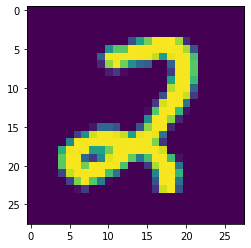

In [ ]:
plt.imshow(X_train_1d[0].reshape(28,28))
print(np.argmax(y_train[0]))

## Addestramento della Rete Neurale
Definiamo e addestriamo la rete neurale, trattandosi di un problema di classificazione multiclasse, la funzione di attivazione dell'ultimo strato deve essere la sigmoide, mentre la funzione di costo da utilizzare è la Categorical Crossentropy.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=[X_train_1d.shape[1]]))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train_1d, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 45.1150 - accuracy: 0.1136
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - accuracy: 0.1139
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.30

Il risultato dell'addestramento è davvero molto scarso.

### Normalizzazione delle immagini
Una rete neurale apprende molti pesi tutti di dimensione abbastanza piccola, e utilizzre delle features con valori elevati può rallentare, se non addirittura rompere, la fase di addestramento. Per questo motivo è sempre consigliabile normalizzare o standardizzare il dataset. Per normalizzare delle immagini è sufficiente dividere per 255 (il valore massimo che un pixel può avere) in modo tale da portare il range di valori a 0-1.

In [ ]:
X_train_norm = X_train_1d/255

Proviamo ora ad addestrare nuovamente la stessa rete neurale di prima.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=[X_train_norm.shape[1]]))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train_norm, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8145 - accuracy: 0.7680
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3442 - accuracy: 0.9006
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2868 - accuracy: 0.9162
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9255
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2317 - accuracy: 0.9322
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2135 - accuracy: 0.9375
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1979 - accuracy: 0.9426
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1845 - accuracy: 0.9465
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9496
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.164

Come vedi ora il risultato è totalmente differente.

## Utilizzare Strati Lambda

Vediamo ora come possiamo utilizzare gli strati lambda per incorporare alcuni calcoli all'interno degli stessi strati della rete.

### Normalizzazione
Aggiungiamo uno strato lambda prima dello strato di input, il cui scopo è normalizzare le immagini, dopodichè eseguiamo l'addestramento sul Train Set non normalizzato.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: x/255))
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=[X_train_1d.shape[1]]))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train_1d, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7986 - accuracy: 0.7780
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3497 - accuracy: 0.8996
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2986 - accuracy: 0.9138
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9227
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2444 - accuracy: 0.9299
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2253 - accuracy: 0.9346
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2088 - accuracy: 0.9397
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1944 - accuracy: 0.9441
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1816 - accuracy: 0.9477
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.170

Come vedi il risultato è lo stesso di prima, dato che anche in questo caso la normalizzazione viene eseguita, ma avviene all'interno della rete neurale.

### Flattening
Aggiungiamo un'ulteriore strato Lambda, per eseguire il flattening delle immagini e addestriamo la rete sul Train Set originale, cioè quello in cui ogni immagine è rappresentata da una matrice.

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: tf.reshape(x, [x.shape[0], x.shape[1]*x.shape[2]])))
model.add(tf.keras.layers.Lambda(lambda x: x/255))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8627 - accuracy: 0.7545
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3488 - accuracy: 0.8991
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.9137
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9237
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2371 - accuracy: 0.9308
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2174 - accuracy: 0.9375
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2012 - accuracy: 0.9420
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1877 - accuracy: 0.9450
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1762 - accuracy: 0.9486
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.167

Il risultato è semrpre lo stesso, abbiamo trasformato la nostra rete neurale in un modello end-to-end. Per finire valutiamo il nostro modello sul Test Set.

In [ ]:
model.evaluate(X_test, y_test)

375/375 [==============================] - 1s 2ms/step - loss: 0.1898 - accuracy: 0.9461


[0.18978886306285858, 0.9460833072662354]

Non c'è overfitting, quindi il modello va bene, quindi possiamo pure utilizzare la rete per riconoscere nuove immagini (non avendo altre immagini utilizzerò sempre il Test Set).

In [ ]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 9, ..., 2, 5, 8])